In [1]:
import psutil, os
import numpy as np
import pandas as pd

def memory_footprint():
    mem = psutil.Process(os.getpid()).memory_info().rss
    return mem / 1024**2

*Built-in function*

In [2]:
before = memory_footprint()
N = 1024 ** 2 // 8 # number of floats that fits into 1 MB
x = np.random.randn(50* N)
after = memory_footprint()
print('Memory useage: ',after - before)

Memory useage:  50.04296875


*Numpy*

In [3]:
before = memory_footprint()
x ** 2
after = memory_footprint()
print('Memory useage: ',after - before)
x.nbytes // 1024 ** 2

Memory useage:  0.01171875


50

*Pandas*

In [4]:
pd.DataFrame(x).memory_usage(index = False) / 1024**2

0    50.0
dtype: float64

### Data in chunks

In [5]:
taxi = pd.read_csv('data/nyctaxi/yellow_tripdata_2015-01.csv')

In [6]:
for chunk in pd.read_csv('data/nyctaxi/yellow_tripdata_2015-01.csv', chunksize = 5000):
    print(type(chunk), chunk.shape)

<class 'pandas.core.frame.DataFrame'> (5000, 19)
<class 'pandas.core.frame.DataFrame'> (5000, 19)
<class 'pandas.core.frame.DataFrame'> (5000, 19)
<class 'pandas.core.frame.DataFrame'> (5000, 19)
<class 'pandas.core.frame.DataFrame'> (5000, 19)
<class 'pandas.core.frame.DataFrame'> (5000, 19)
<class 'pandas.core.frame.DataFrame'> (5000, 19)
<class 'pandas.core.frame.DataFrame'> (5000, 19)
<class 'pandas.core.frame.DataFrame'> (5000, 19)
<class 'pandas.core.frame.DataFrame'> (5000, 19)
<class 'pandas.core.frame.DataFrame'> (5000, 19)
<class 'pandas.core.frame.DataFrame'> (5000, 19)
<class 'pandas.core.frame.DataFrame'> (5000, 19)
<class 'pandas.core.frame.DataFrame'> (5000, 19)
<class 'pandas.core.frame.DataFrame'> (5000, 19)
<class 'pandas.core.frame.DataFrame'> (4673, 19)


In [7]:
# use a man made dataframe
tmp = pd.read_csv('data/nyctaxi/yellow_tripdata_2015-01.csv',parse_dates=['tpep_pickup_datetime', 'tpep_dropoff_datetime'])
tmp["trip_time_in_secs"] = (tmp.tpep_dropoff_datetime - tmp.tpep_pickup_datetime).dt.seconds
tmp.to_csv('data/nyctaxi/nytaxis.csv', index = False)

# use a filter
def filter_long_trip(data):
    is_long_trip = data.trip_time_in_secs > 1200
    return data.loc[is_long_trip,:]

# read data in chunks, add to a list and concat the list using pandas
chunks = [filter_long_trip(chunk) for chunk in pd.read_csv('data/nyctaxi/nytaxis.csv', chunksize=1000)]
df = pd.concat(chunks)

In [8]:
pd.read_csv('data/WDI.csv')

,Country Name,Country Code,Indicator Name,Indicator Code,Year,value,Region
0,American Samoa,ASM,Agricultural land (% of land area),AG.LND.AGRI.ZS,1980,1.500000e+01,East Asia & Pacific
1,American Samoa,ASM,Agricultural land (sq. km),AG.LND.AGRI.K2,1980,3.000000e+01,East Asia & Pacific
2,American Samoa,ASM,"Agricultural machinery, tractors",AG.AGR.TRAC.NO,1980,1.200000e+01,East Asia & Pacific
3,American Samoa,ASM,"Agricultural machinery, tractors per 100 sq. k...",AG.LND.TRAC.ZS,1980,1.200000e+02,East Asia & Pacific
4,American Samoa,ASM,Arable land (% of land area),AG.LND.ARBL.ZS,1980,5.000000e+00,East Asia & Pacific
...,...,...,...,...,...,...,...
91043,Vietnam,VNM,Urban population,SP.URB.TOTL,2015,3.080925e+07,East Asia & Pacific
91044,Vietnam,VNM,Urban population (% of total),SP.URB.TOTL.IN.ZS,2015,3.359300e+01,East Asia & Pacific
91045,Vietnam,VNM,Urban population growth (annual %),SP.URB.GROW,2015,3.008757e+00,East Asia & Pacific
91046,Vietnam,VNM,Land area (sq. km),AG.LND.TOTL.K2,2016,3.100700e+05,East Asia & Pacific


In [9]:
chunks = []
for chunk in pd.read_csv('data/WDI.csv', chunksize = 1000):
    is_urban = chunk['Indicator Name'] == 'Urban population (% of total)'
    is_AUS = chunk['Country Code']=='AUS'
    chunks.append(chunk.loc[is_urban & is_AUS])
pd.concat(chunks).head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,value,Region
875,Australia,AUS,Urban population (% of total),SP.URB.TOTL.IN.ZS,1980,85.76,East Asia & Pacific
950,Australia,AUS,Urban population (% of total),SP.URB.TOTL.IN.ZS,1981,85.70,East Asia & Pacific
1026,Australia,AUS,Urban population (% of total),SP.URB.TOTL.IN.ZS,1982,85.64,East Asia & Pacific
1101,Australia,AUS,Urban population (% of total),SP.URB.TOTL.IN.ZS,1983,85.58,East Asia & Pacific
1176,Australia,AUS,Urban population (% of total),SP.URB.TOTL.IN.ZS,1984,85.52,East Asia & Pacific
1251,Australia,AUS,Urban population (% of total),SP.URB.TOTL.IN.ZS,1985,85.46,East Asia & Pacific
1328,Australia,AUS,Urban population (% of total),SP.URB.TOTL.IN.ZS,1986,85.40,East Asia & Pacific
1404,Australia,AUS,Urban population (% of total),SP.URB.TOTL.IN.ZS,1987,85.40,East Asia & Pacific
1479,Australia,AUS,Urban population (% of total),SP.URB.TOTL.IN.ZS,1988,85.40,East Asia & Pacific
1554,Australia,AUS,Urban population (% of total),SP.URB.TOTL.IN.ZS,1989,85.40,East Asia & Pacific


In [10]:
pd.read_csv('data/nyctaxi/nytaxis.csv')['trip_distance'].sum()

220576.87

In [11]:
chunk_distances = (chunk['trip_distance'].sum() for chunk in pd.read_csv('data/nyctaxi/nytaxis.csv', chunksize = 1000))
sum(chunk_distances)

220576.8700000001

In [12]:
# next(chunk_distances)

### Delayed operations of files

In [13]:
def count_long_trips(df):
    df["trip_time_in_secs"] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime).dt.seconds
    is_long_trip = df['trip_time_in_secs'] > 1200
    result_dict = {
        "n_long":[is_long_trip.sum()],
        "n_total":[len(df)]
    }
    return pd.DataFrame(result_dict)

filenames = ['data/nyctaxi/yellow_tripdata_2015-{:02d}.csv'.format(i) for i in range(1,4)]
dataframes = (pd.read_csv(file, parse_dates=[1,2]) for file in filenames)
totals = (count_long_trips(df) for df in dataframes)
sum(totals)

,n_long,n_total
0,35321,201524


In [14]:
df1 = np.random.randint(1,10,(3,4))
df2 = np.random.randint(1,10,(3,4))
df3 = np.random.randint(1,10,(3,4))
df4 = np.random.randint(1,10,(3,4))
sum([df1,df2,df3,df4])

array([[23, 12, 20, 22],
       [15, 12, 16, 21],
       [30,  6,  8, 14]])

In [15]:
os.listdir('./data/nyctaxi/')

['.DS_Store',
 'nytaxis.csv',
 'yellow_tripdata_2015-01.csv',
 'yellow_tripdata_2015-02.csv',
 'yellow_tripdata_2015-03.csv']

### Delayed operation in dask

In [23]:
import math
from dask import delayed

@delayed
def f(x):
    return math.sqrt(x + 4)

@delayed
def g(y):
    return y + 2

@delayed
def h(z):
    return z ** 2

In [26]:
x = 3
w = h(g(f(x)))

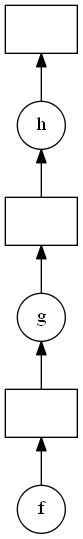

In [27]:
w.visualize()

In [22]:
w.compute()

21.583005244258363

In [54]:
@delayed
def increment(x):
    return x + 1

@delayed
def double(x):
    return 2 * x

@delayed
def add(x,y):
    return x + y

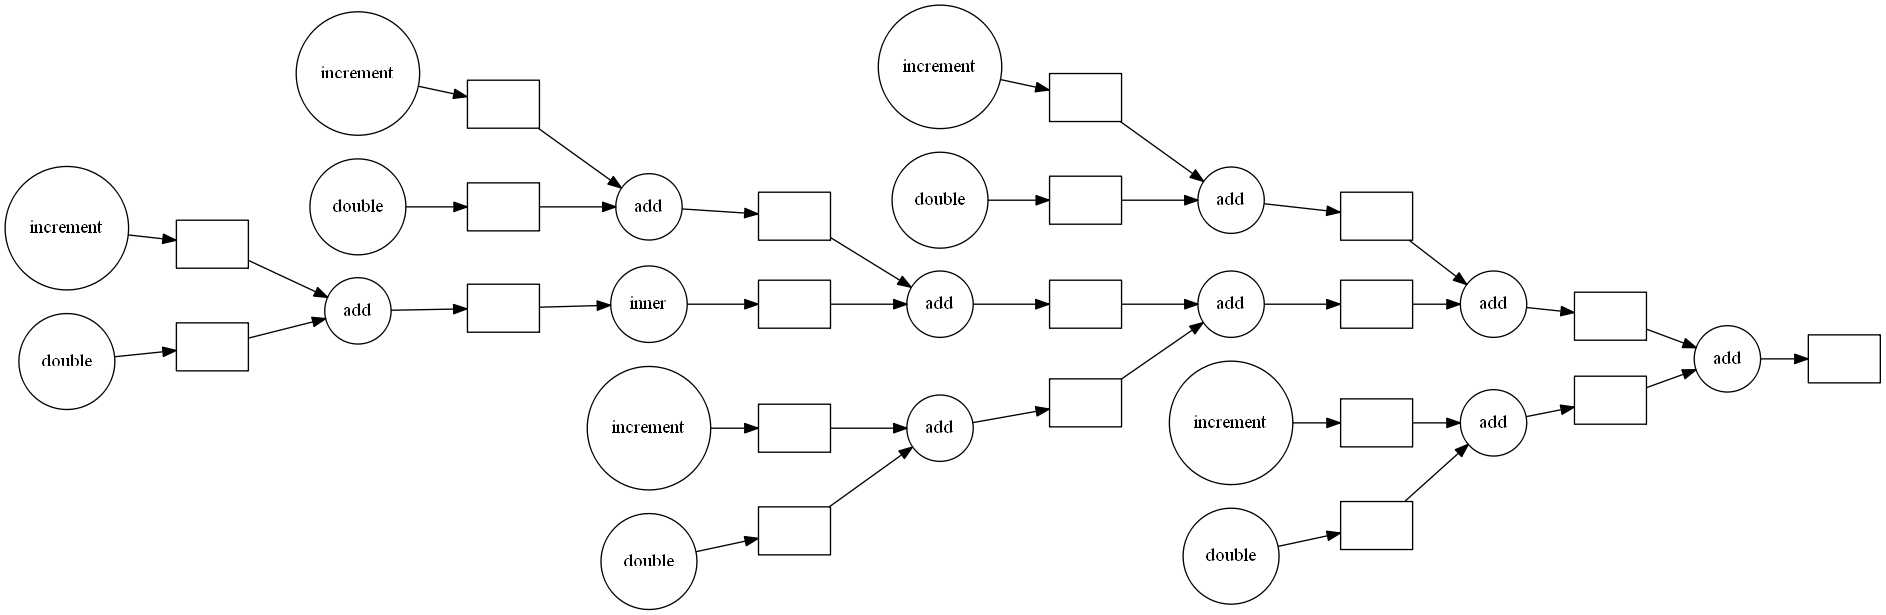

In [61]:
data = [1,2,3,4,5]
out = []
for x in data:
    a = increment(x)
    b = double(x)
    c = add(a,b)
    out.append(c)
total = sum(out)
total.compute()
total.visualize(rankdir = 'LR')

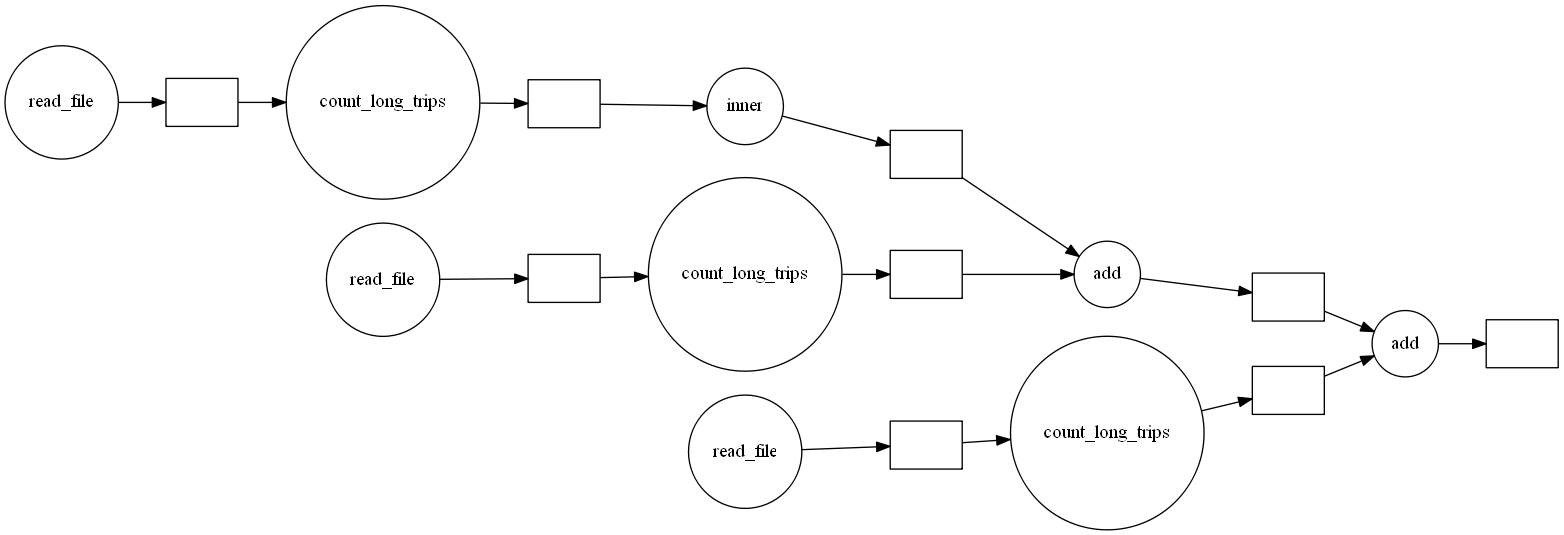

In [77]:
template = 'data/nyctaxi/yellow_tripdata_2015-{:02}.csv'
filenames = [template.format(i) for i in range(1,4)]

@delayed
def count_long_trips(df):
    df["trip_time_in_secs"] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime).dt.seconds
    is_long_trip = df['trip_time_in_secs'] > 1200
    result_dict = {
        'n_long_trips':[sum(is_long_trip)],
        'n_total': len(df)
    }
    return pd.DataFrame(result_dict)

@delayed
def read_file(filename):
    return pd.read_csv(filename, parse_dates=[1,2])

total = sum([count_long_trips(read_file(filename))for filename in filenames])
result = total.compute()

total.visualize(rankdir = 'LR')

In [80]:
a = np.random.randn(10000)
len(a), a.shape

(10000, (10000,))

In [83]:
import dask.array as da
a_dask = da.from_array(a, chunks = len(a) // 5)
a_dask

dask.array<array, shape=(10000,), dtype=float64, chunksize=(2000,), chunktype=numpy.ndarray>

In [84]:
a_dask.chunks

((2000, 2000, 2000, 2000, 2000),)

In [85]:
a_dask.sum()

dask.array<sum-aggregate, shape=(), dtype=float64, chunksize=(), chunktype=numpy.ndarray>